In [319]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

In [320]:
#Demographic Variables and Sample Weights (DEMO_L)

url_demographics = 'https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/DEMO_L.XPT'

response = requests.get(url_demographics)

if response.status_code == 200:
    with open('DEMO_L.XPT', 'wb') as file:
        file.write(response.content)
    print('File downloaded successfully! \u2705')
else:
    print('Oops! Something went wrong. Status code: {response.content_code}. Looks like the file is playing hard to get.')

File downloaded successfully! ✅


In [321]:
demographics_data = pd.read_sas('DEMO_L.XPT')

demographics_data.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHRGND,DMDHRAGZ,DMDHREDZ,DMDHRMAZ,DMDHSEDZ,WTINT2YR,WTMEC2YR,SDMVSTRA,SDMVPSU,INDFMPIR
0,130378.0,12.0,2.0,1.0,43.0,NaN,5.0,6.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,50055.450807,54374.463898,173.0,2.0,5.00
1,130379.0,12.0,2.0,1.0,66.0,NaN,3.0,3.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,29087.450605,34084.721548,173.0,2.0,5.00
2,130380.0,12.0,2.0,2.0,44.0,NaN,2.0,2.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,80062.674301,81196.277992,174.0,1.0,1.41
3,130381.0,12.0,2.0,2.0,5.0,NaN,5.0,7.0,1.0,71.0,...,2.0,2.0,2.0,3.0,NaN,38807.268902,55698.607106,182.0,2.0,1.53
4,130382.0,12.0,2.0,1.0,2.0,NaN,3.0,3.0,2.0,34.0,...,2.0,2.0,3.0,1.0,2.0,30607.519774,36434.146346,182.0,2.0,3.60


In [322]:
column_rename_dict = {
    'SEQN': 'ID',
    'SDDSRVYR': 'Data release cycle',
    'RIDSTATR': 'Interview/Examination status',
    'RIAGENDR': 'Gender',
    'RIDAGEYR': 'Age in years at screening',
    'RIDAGEMN': 'Age in months at screening - 0 to 24 mos',
    'RIDRETH1': 'Race/Hispanic origin',
    'RIDRETH3': 'Race/Hispanic origin w/ NH Asian',
    'RIDEXMON': 'Six-month time period',
    'RIDEXAGM': 'Age in months at exam - 0 to 19 years',
    'DMQMILIZ': 'Served active duty in US Armed Forces',
    'DMDBORN4': 'Country of birth',
    'DMDYRUSR': 'Length of time in US',
    'DMDEDUC2': 'Education level - Adults 20+',
    'DMDMARTZ': 'Marital status',
    'RIDEXPRG': 'Pregnancy status at exam',
    'DMDHHSIZ': 'Total number of people in the Household',
    'DMDHRGND': 'HH ref person’s gender',
    'DMDHRAGZ': 'HH ref person’s age in years',
    'DMDHREDZ': 'HH ref person’s education level',
    'DMDHRMAZ': 'HH ref person’s marital status',
    'DMDHSEDZ': 'HH ref person’s spouse’s education level',
    'WTINT2YR': 'Full sample 2-year interview weight',
    'WTMEC2YR': 'Full sample 2-year MEC exam weight',
    'SDMVSTRA': 'Masked variance pseudo-stratum',
    'SDMVPSU': 'Masked variance pseudo-PSU',
    'INDFMPIR': 'Ratio of family income to poverty'
}

demographics_data = demographics_data.rename(columns=column_rename_dict)

demographics_data.head()

,ID,Data release cycle,Interview/Examination status,Gender,Age in years at screening,Age in months at screening - 0 to 24 mos,Race/Hispanic origin,Race/Hispanic origin w/ NH Asian,Six-month time period,Age in months at exam - 0 to 19 years,...,HH ref person’s gender,HH ref person’s age in years,HH ref person’s education level,HH ref person’s marital status,HH ref person’s spouse’s education level,Full sample 2-year interview weight,Full sample 2-year MEC exam weight,Masked variance pseudo-stratum,Masked variance pseudo-PSU,Ratio of family income to poverty
0,130378.0,12.0,2.0,1.0,43.0,NaN,5.0,6.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,50055.450807,54374.463898,173.0,2.0,5.00
1,130379.0,12.0,2.0,1.0,66.0,NaN,3.0,3.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,29087.450605,34084.721548,173.0,2.0,5.00
2,130380.0,12.0,2.0,2.0,44.0,NaN,2.0,2.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,80062.674301,81196.277992,174.0,1.0,1.41
3,130381.0,12.0,2.0,2.0,5.0,NaN,5.0,7.0,1.0,71.0,...,2.0,2.0,2.0,3.0,NaN,38807.268902,55698.607106,182.0,2.0,1.53
4,130382.0,12.0,2.0,1.0,2.0,NaN,3.0,3.0,2.0,34.0,...,2.0,2.0,3.0,1.0,2.0,30607.519774,36434.146346,182.0,2.0,3.60


In [323]:
demographics_data.columns

Index(['ID', 'Data release cycle', 'Interview/Examination status', 'Gender',
       'Age in years at screening', 'Age in months at screening - 0 to 24 mos',
       'Race/Hispanic origin', 'Race/Hispanic origin w/ NH Asian',
       'Six-month time period', 'Age in months at exam - 0 to 19 years',
       'Served active duty in US Armed Forces', 'Country of birth',
       'Length of time in US', 'Education level - Adults 20+',
       'Marital status', 'Pregnancy status at exam',
       'Total number of people in the Household', 'HH ref person’s gender',
       'HH ref person’s age in years', 'HH ref person’s education level',
       'HH ref person’s marital status',
       'HH ref person’s spouse’s education level',
       'Full sample 2-year interview weight',
       'Full sample 2-year MEC exam weight', 'Masked variance pseudo-stratum',
       'Masked variance pseudo-PSU', 'Ratio of family income to poverty'],
      dtype='object')

In [324]:
demographics_data.shape

(11933, 27)

In [325]:
demographics_data.nunique()

ID                                          11933
Data release cycle                              1
Interview/Examination status                    2
Gender                                          2
Age in years at screening                      81
Age in months at screening - 0 to 24 mos       25
Race/Hispanic origin                            5
Race/Hispanic origin w/ NH Asian                6
Six-month time period                           2
Age in months at exam - 0 to 19 years         240
Served active duty in US Armed Forces           3
Country of birth                                2
Length of time in US                            8
Education level - Adults 20+                    6
Marital status                                  5
Pregnancy status at exam                        3
Total number of people in the Household         7
HH ref person’s gender                          2
HH ref person’s age in years                    4
HH ref person’s education level                 3


In [326]:
demographics_data.duplicated().sum()

np.int64(0)

In [327]:
demographics_data.isnull().sum()

ID                                              0
Data release cycle                              0
Interview/Examination status                    0
Gender                                          0
Age in years at screening                       0
Age in months at screening - 0 to 24 mos    11556
Race/Hispanic origin                            0
Race/Hispanic origin w/ NH Asian                0
Six-month time period                        3073
Age in months at exam - 0 to 19 years        9146
Served active duty in US Armed Forces        3632
Country of birth                               19
Length of time in US                        10058
Education level - Adults 20+                 4139
Marital status                               4141
Pregnancy status at exam                    10430
Total number of people in the Household         0
HH ref person’s gender                       7818
HH ref person’s age in years                 7809
HH ref person’s education level              8187


In [328]:
demographics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID                                        11933 non-null  float64
 1   Data release cycle                        11933 non-null  float64
 2   Interview/Examination status              11933 non-null  float64
 3   Gender                                    11933 non-null  float64
 4   Age in years at screening                 11933 non-null  float64
 5   Age in months at screening - 0 to 24 mos  377 non-null    float64
 6   Race/Hispanic origin                      11933 non-null  float64
 7   Race/Hispanic origin w/ NH Asian          11933 non-null  float64
 8   Six-month time period                     8860 non-null   float64
 9   Age in months at exam - 0 to 19 years     2787 non-null   float64
 10  Served active duty in US Armed For

In [329]:
demographics_data.describe()

,ID,Data release cycle,Interview/Examination status,Gender,Age in years at screening,Age in months at screening - 0 to 24 mos,Race/Hispanic origin,Race/Hispanic origin w/ NH Asian,Six-month time period,Age in months at exam - 0 to 19 years,...,HH ref person’s gender,HH ref person’s age in years,HH ref person’s education level,HH ref person’s marital status,HH ref person’s spouse’s education level,Full sample 2-year interview weight,Full sample 2-year MEC exam weight,Masked variance pseudo-stratum,Masked variance pseudo-PSU,Ratio of family income to poverty
count,11933.000000,11933.0,11933.000000,11933.000000,1.193300e+04,3.770000e+02,11933.000000,11933.000000,8860.000000,2.787000e+03,...,4115.000000,4124.000000,3746.000000,4020.000000,2127.000000,11933.000000,1.193300e+04,11933.000000,11933.000000,9.892000e+03
mean,136344.000000,12.0,1.742479,1.532808,3.831786e+01,1.162865e+01,3.104584,3.320540,1.520203,1.219085e+02,...,1.564277,2.539525,2.171383,1.381095,2.275035,27404.135674,2.740414e+04,179.918294,1.491746,2.708174e+00
std,3444.904716,0.0,0.437287,0.498943,2.560199e+01,6.805429e+00,1.076346,1.518379,0.499620,6.715865e+01,...,0.495912,0.641094,0.660132,0.681421,0.694050,19449.155209,2.796296e+04,4.309624,0.499953,1.670119e+00
min,130378.000000,12.0,1.000000,1.000000,5.397605e-79,5.397605e-79,1.000000,1.000000,1.000000,5.397605e-79,...,1.000000,1.000000,1.000000,1.000000,1.000000,4584.463196,5.397605e-79,173.000000,1.000000,5.397605e-79
25%,133361.000000,12.0,1.000000,1.000000,1.300000e+01,6.000000e+00,3.000000,3.000000,1.000000,6.600000e+01,...,1.000000,2.000000,2.000000,1.000000,2.000000,14331.753594,5.397605e-79,176.000000,1.000000,1.180000e+00
50%,136344.000000,12.0,2.000000,2.000000,3.700000e+01,1.100000e+01,3.000000,3.000000,2.000000,1.220000e+02,...,2.000000,2.000000,2.000000,1.000000,2.000000,21670.185970,2.171785e+04,180.000000,1.000000,2.500000e+00
75%,139327.000000,12.0,2.000000,2.000000,6.200000e+01,1.700000e+01,4.000000,4.000000,2.000000,1.795000e+02,...,2.000000,3.000000,3.000000,2.000000,3.000000,33831.331556,3.834115e+04,184.000000,2.000000,4.500000e+00
max,142310.000000,12.0,2.000000,2.000000,8.000000e+01,2.400000e+01,5.000000,7.000000,2.000000,2.390000e+02,...,2.000000,4.000000,3.000000,3.000000,3.000000,170968.343177,2.271083e+05,187.000000,2.000000,5.000000e+00


In [330]:
demographics_data.var()

ID                                          1.186737e+07
Data release cycle                          0.000000e+00
Interview/Examination status                1.912200e-01
Gender                                      2.489445e-01
Age in years at screening                   6.554619e+02
Age in months at screening - 0 to 24 mos    4.631386e+01
Race/Hispanic origin                        1.158522e+00
Race/Hispanic origin w/ NH Asian            2.305476e+00
Six-month time period                       2.496200e-01
Age in months at exam - 0 to 19 years       4.510285e+03
Served active duty in US Armed Forces       7.973634e-02
Country of birth                            1.326212e-01
Length of time in US                        2.505623e+02
Education level - Adults 20+                1.331139e+00
Marital status                              9.616696e+00
Pregnancy status at exam                    2.354714e-01
Total number of people in the Household     2.888341e+00
HH ref person’s gender         

In [331]:
demographics_data.corr()

,ID,Data release cycle,Interview/Examination status,Gender,Age in years at screening,Age in months at screening - 0 to 24 mos,Race/Hispanic origin,Race/Hispanic origin w/ NH Asian,Six-month time period,Age in months at exam - 0 to 19 years,...,HH ref person’s gender,HH ref person’s age in years,HH ref person’s education level,HH ref person’s marital status,HH ref person’s spouse’s education level,Full sample 2-year interview weight,Full sample 2-year MEC exam weight,Masked variance pseudo-stratum,Masked variance pseudo-PSU,Ratio of family income to poverty
ID,1.000000,NaN,0.000901,0.029206,0.010956,0.082122,-0.011571,-0.013413,0.011338,0.005944,...,-0.006682,0.007455,0.015893,-0.014719,0.009883,0.009036,0.000214,0.006987,0.021943,0.003477
Data release cycle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Interview/Examination status,0.000901,NaN,1.000000,0.005500,0.105296,-0.058379,-0.009725,-0.018300,NaN,NaN,...,0.009091,0.044113,0.036095,-0.018280,0.006186,0.010331,0.577186,-0.042429,-0.014132,0.032360
Gender,0.029206,NaN,0.005500,1.000000,0.043696,0.029786,-0.001240,-0.007743,0.004003,0.012235,...,0.014105,-0.021951,-0.009732,-0.006256,-0.003304,-0.068612,-0.047722,0.018143,0.007889,-0.045518
Age in years at screening,0.010956,NaN,0.105296,0.043696,1.000000,0.862666,0.032357,-0.007554,0.035735,0.998621,...,0.033726,0.255296,-0.047032,0.079034,-0.066466,0.036957,0.027675,-0.039081,-0.008808,0.157336
Age in months at screening - 0 to 24 mos,0.082122,NaN,-0.058379,0.029786,0.862666,1.000000,0.005543,-0.007307,0.016735,0.992935,...,-0.015380,0.045987,-0.038943,-0.025912,0.071868,0.026981,-0.001652,-0.019186,-0.033623,0.003080
Race/Hispanic origin,-0.011571,NaN,-0.009725,-0.001240,0.032357,0.005543,1.000000,0.959359,0.091678,-0.038719,...,-0.019576,0.013960,0.187545,0.051804,0.235329,-0.002230,0.001366,0.035701,0.092402,0.036055
Race/Hispanic origin w/ NH Asian,-0.013413,NaN,-0.018300,-0.007743,-0.007554,-0.007307,0.959359,1.000000,0.075332,-0.035546,...,-0.031529,0.015584,0.146670,0.030234,0.180997,-0.011441,-0.008976,-0.003029,0.084466,0.005096
Six-month time period,0.011338,NaN,NaN,0.004003,0.035735,0.016735,0.091678,0.075332,1.000000,0.011826,...,-0.031344,-0.017271,0.074069,-0.072955,0.125656,0.166089,0.156672,-0.158734,0.123716,0.108146
Age in months at exam - 0 to 19 years,0.005944,NaN,NaN,0.012235,0.998621,0.992935,-0.038719,-0.035546,0.011826,1.000000,...,0.019831,0.269891,-0.042292,0.081807,-0.064256,0.161860,0.059913,-0.027304,-0.013109,0.016464


In [ ]:
#Blood Pressure - Oscillometric Measurements (BPXO_L)

url_blood_pressure = 'https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/BPXO_L.xpt'

response = requests.get(url_blood_pressure)

if response.status_code == 200:
    with open('BPXO_L.xpt', 'wb') as file:
        file.write(response.content)
    print('File downloaded successfully! \u2705')
else:
    print('Oops! Something went wrong. Status code: {response.content_code}. Looks like the file is playing hard to get.')

File downloaded successfully! ✅


In [333]:
blood_pressure_data = pd.read_sas('BPXO_L.xpt')

blood_pressure_data.head()

,SEQN,BPAOARM,BPAOCSZ,BPXOSY1,BPXODI1,BPXOSY2,BPXODI2,BPXOSY3,BPXODI3,BPXOPLS1,BPXOPLS2,BPXOPLS3
0,130378.0,b'R',4.0,135.0,98.0,131.0,96.0,132.0,94.0,82.0,79.0,82.0
1,130379.0,b'R',4.0,121.0,84.0,117.0,76.0,113.0,76.0,72.0,71.0,73.0
2,130380.0,b'R',4.0,111.0,79.0,112.0,80.0,104.0,76.0,84.0,83.0,77.0
3,130386.0,b'R',4.0,110.0,72.0,120.0,74.0,115.0,75.0,59.0,64.0,64.0
4,130387.0,b'R',4.0,143.0,76.0,136.0,74.0,145.0,78.0,80.0,80.0,77.0


In [334]:
column_rename_dict = {
    'SEQN': 'ID',
    'BPAOARM': 'Arm selected - oscillometric',
    'BPAOCSZ': 'Coded cuff size - oscillometric',
    'BPXOSY1': 'Systolic - 1st oscillometric reading',
    'BPXODI1': 'Diastolic - 1st oscillometric reading',
    'BPXOSY2': 'Systolic - 2nd oscillometric reading',
    'BPXODI2': 'Diastolic - 2nd oscillometric reading',
    'BPXOSY3': 'Systolic - 3rd oscillometric reading',
    'BPXODI3': 'Diastolic - 3rd oscillometric reading',
    'BPXOPLS1': 'Pulse - 1st oscillometric reading',
    'BPXOPLS2': 'Pulse - 2nd oscillometric reading',
    'BPXOPLS3': 'Pulse - 3rd oscillometric reading'
}

blood_pressure_data.rename(columns=column_rename_dict, inplace=True)

blood_pressure_data.head()

,ID,Arm selected - oscillometric,Coded cuff size - oscillometric,Systolic - 1st oscillometric reading,Diastolic - 1st oscillometric reading,Systolic - 2nd oscillometric reading,Diastolic - 2nd oscillometric reading,Systolic - 3rd oscillometric reading,Diastolic - 3rd oscillometric reading,Pulse - 1st oscillometric reading,Pulse - 2nd oscillometric reading,Pulse - 3rd oscillometric reading
0,130378.0,b'R',4.0,135.0,98.0,131.0,96.0,132.0,94.0,82.0,79.0,82.0
1,130379.0,b'R',4.0,121.0,84.0,117.0,76.0,113.0,76.0,72.0,71.0,73.0
2,130380.0,b'R',4.0,111.0,79.0,112.0,80.0,104.0,76.0,84.0,83.0,77.0
3,130386.0,b'R',4.0,110.0,72.0,120.0,74.0,115.0,75.0,59.0,64.0,64.0
4,130387.0,b'R',4.0,143.0,76.0,136.0,74.0,145.0,78.0,80.0,80.0,77.0


In [335]:
blood_pressure_data.columns

Index(['ID', 'Arm selected - oscillometric', 'Coded cuff size - oscillometric',
       'Systolic - 1st oscillometric reading',
       'Diastolic - 1st oscillometric reading',
       'Systolic - 2nd oscillometric reading',
       'Diastolic - 2nd oscillometric reading',
       'Systolic - 3rd oscillometric reading',
       'Diastolic - 3rd oscillometric reading',
       'Pulse - 1st oscillometric reading',
       'Pulse - 2nd oscillometric reading',
       'Pulse - 3rd oscillometric reading'],
      dtype='object')

In [336]:
print("\033[33mDataFrame before dropping NaNs:\033[0m")
blood_pressure_data.shape

DataFrame before dropping NaNs:


(7801, 12)

In [337]:
blood_pressure_data.isnull().sum()

ID                                         0
Arm selected - oscillometric               0
Coded cuff size - oscillometric          190
Systolic - 1st oscillometric reading     284
Diastolic - 1st oscillometric reading    284
Systolic - 2nd oscillometric reading     296
Diastolic - 2nd oscillometric reading    296
Systolic - 3rd oscillometric reading     321
Diastolic - 3rd oscillometric reading    321
Pulse - 1st oscillometric reading        284
Pulse - 2nd oscillometric reading        296
Pulse - 3rd oscillometric reading        321
dtype: int64

In [338]:
blood_pressure_data = blood_pressure_data.dropna()

In [339]:
print("\033[33mDataFrame After dropping NaNs:\033[0m")
blood_pressure_data.shape

#Previously there was 7801 rows - 7478 = 323


DataFrame After dropping NaNs:


(7478, 12)

In [340]:
blood_pressure_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7478 entries, 0 to 7800
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ID                                     7478 non-null   float64
 1   Arm selected - oscillometric           7478 non-null   object 
 2   Coded cuff size - oscillometric        7478 non-null   float64
 3   Systolic - 1st oscillometric reading   7478 non-null   float64
 4   Diastolic - 1st oscillometric reading  7478 non-null   float64
 5   Systolic - 2nd oscillometric reading   7478 non-null   float64
 6   Diastolic - 2nd oscillometric reading  7478 non-null   float64
 7   Systolic - 3rd oscillometric reading   7478 non-null   float64
 8   Diastolic - 3rd oscillometric reading  7478 non-null   float64
 9   Pulse - 1st oscillometric reading      7478 non-null   float64
 10  Pulse - 2nd oscillometric reading      7478 non-null   float64
 11  Pulse - 3

In [ ]:
grouped_systolic = blood_pressure_data.groupby('ID')['Average_systolic'].mean()
print("Average Systolic for each ID:")
print(grouped_systolic)

grouped_diastolic = blood_pressure_data.groupby('ID')['Average_diastolic'].mean()
print("\nAverage Diastolic for each ID:")
print(grouped_diastolic)

grouped_pulse = blood_pressure_data.groupby('ID')['Average_pulse'].mean()
print("\nAverage Pulse for each ID:")
print(grouped_pulse)

Average Systolic for each ID:
ID
130378.0    132.666667
130379.0    117.000000
130380.0    109.000000
130386.0    115.000000
130387.0    141.333333
               ...    
142305.0    143.666667
142307.0    130.000000
142308.0    108.000000
142309.0    126.666667
142310.0    126.000000
Name: Average_systolic, Length: 7478, dtype: float64

Average Diastolic for each ID:
ID
130378.0    96.000000
130379.0    78.666667
130380.0    78.333333
130386.0    73.666667
130387.0    76.000000
              ...    
142305.0    79.333333
142307.0    73.333333
142308.0    69.333333
142309.0    81.333333
142310.0    80.000000
Name: Average_diastolic, Length: 7478, dtype: float64

Average Pulse for each ID:
ID
130378.0    81.000000
130379.0    72.000000
130380.0    81.333333
130386.0    62.333333
130387.0    79.000000
              ...    
142305.0    70.666667
142307.0    69.333333
142308.0    62.666667
142309.0    80.666667
142310.0    78.000000
Name: Average_pulse, Length: 7478, dtype: float64


In [ ]:
blood_pressure_data['Average_pulse'] = blood_pressure_data[['Pulse - 1st oscillometric reading', 'Pulse - 2nd oscillometric reading', 'Pulse - 3rd oscillometric reading']].mean(axis=1)
blood_pressure_data['Average_systolic'] = blood_pressure_data[['Systolic - 1st oscillometric reading','Systolic - 2nd oscillometric reading','Systolic - 3rd oscillometric reading']].mean(axis=1)
blood_pressure_data['Average_diastolic'] = blood_pressure_data[['Diastolic - 1st oscillometric reading','Diastolic - 2nd oscillometric reading','Diastolic - 3rd oscillometric reading']].mean(axis=1)

blood_pressure_data = blood_pressure_data[['ID','Average_systolic','Average_diastolic','Average_pulse']]
blood_pressure_data.head()

,ID,Average_systolic,Average_diastolic,Average_pulse
0,130378.0,132.666667,96.000000,81.000000
1,130379.0,117.000000,78.666667,72.000000
2,130380.0,109.000000,78.333333,81.333333
3,130386.0,115.000000,73.666667,62.333333
4,130387.0,141.333333,76.000000,79.000000


In [350]:
print("\033[33mDataFrame After Average each Column:\033[0m")
blood_pressure_data.columns

DataFrame After Average each Column:


Index(['ID', 'Average_systolic', 'Average_diastolic', 'Average_pulse'], dtype='object')

In [342]:
blood_pressure_data.describe()

,ID,Average_systolic,Average_diastolic,Average_pulse
count,7478.000000,7478.000000,7478.000000,7478.000000
mean,136336.039850,119.097664,72.222698,73.026166
std,3452.861987,18.111297,11.457914,12.548291
min,130378.000000,71.333333,34.000000,34.000000
25%,133315.250000,106.333333,64.000000,64.333333
50%,136354.500000,116.333333,71.666667,72.000000
75%,139314.750000,129.000000,79.333333,81.000000
max,142310.000000,232.333333,139.000000,151.000000


In [346]:
blood_pressure_data.var()

ID                   1.192226e+07
Average_systolic     3.280191e+02
Average_diastolic    1.312838e+02
Average_pulse        1.574596e+02
dtype: float64

In [347]:
blood_pressure_data.corr()

,ID,Average_systolic,Average_diastolic,Average_pulse
ID,1.000000,-0.007415,-0.029971,-0.010373
Average_systolic,-0.007415,1.000000,0.674464,-0.145119
Average_diastolic,-0.029971,0.674464,1.000000,0.127865
Average_pulse,-0.010373,-0.145119,0.127865,1.000000


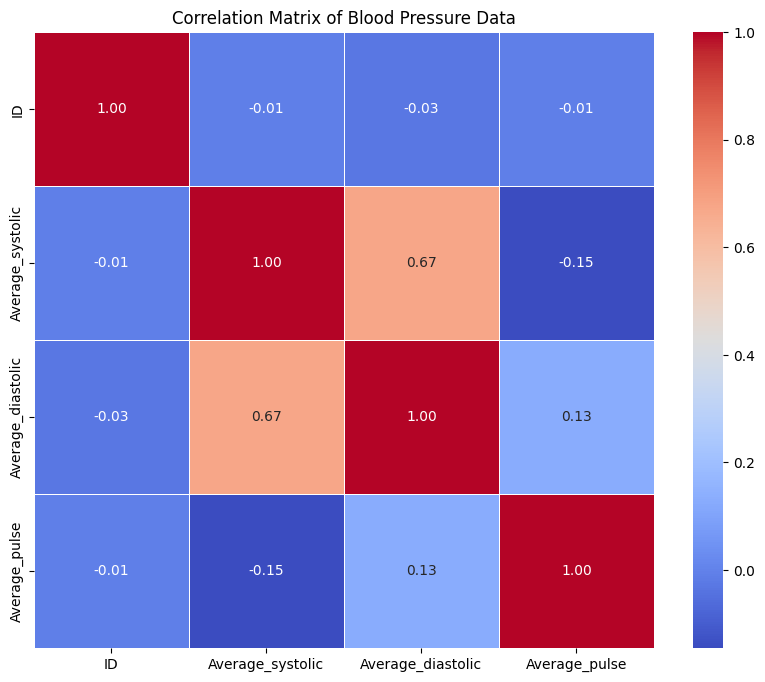

In [348]:
corr_matrix = blood_pressure_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Blood Pressure Data')
plt.show()

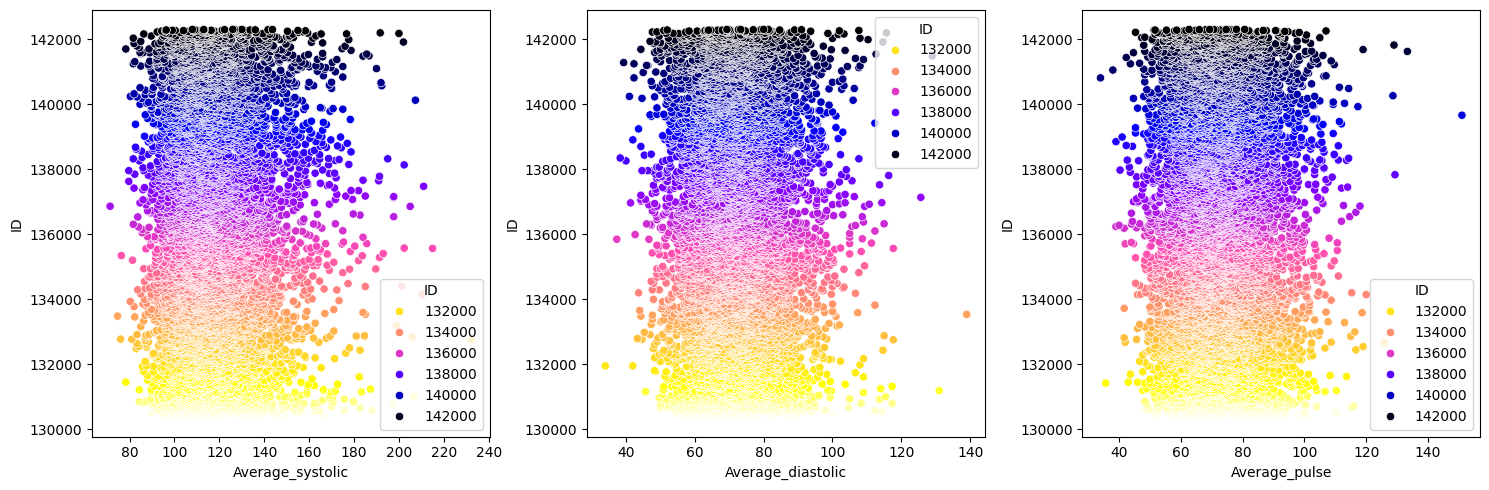

In [ ]:
fig, axis = plt.subplots(1, 3, figsize=(15, 5))

palette = sns.color_palette("gnuplot2_r", as_cmap=True)

sns.scatterplot(ax=axis[0], data=blood_pressure_data, x="Average_systolic", y="ID", hue="ID", palette=palette)
sns.scatterplot(ax=axis[1], data=blood_pressure_data, x="Average_diastolic", y="ID", hue="ID", palette=palette)
sns.scatterplot(ax=axis[2], data=blood_pressure_data, x="Average_pulse", y="ID", hue="ID", palette=palette)

plt.tight_layout()

plt.show()

# Summary: This set of scatter plots shows how blood pressure measures (`Average_systolic`, `Average_diastolic`, `Average_pulse`) 
# relate to each `ID`.

# Blood Pressure:
# - Normal: Systolic < 120, Diastolic < 80
# - Elevated: Systolic 120–129, Diastolic < 80
# - Stage 1 High BP: Systolic 130–139, Diastolic 80–89
# - Stage 2 High BP: Systolic 140+, Diastolic 90+
# - Hypertensive Crisis: Systolic > 180, Diastolic > 120 (seek help right away)

# Pulse (Heart Rate):
# - Normal: 60–100 beats per minute (bpm)
# - Low Pulse: Below 60 bpm (could be normal for athletes)
# - High Pulse: Above 100 bpm (could mean stress, fever, or other issues)

# In short:
# - Normal BP: Systolic < 120, Diastolic < 80
# - Normal Pulse: 60–100 bpm

# If either is much higher or lower, it's a good idea to talk to a doctor.